In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
orig_train = train.copy()
orig_test = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

In [8]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

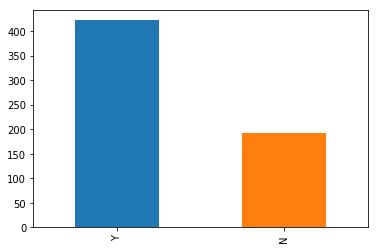

In [11]:
train["Loan_Status"].value_counts().plot.bar()

# Analysis of Categorical Variables

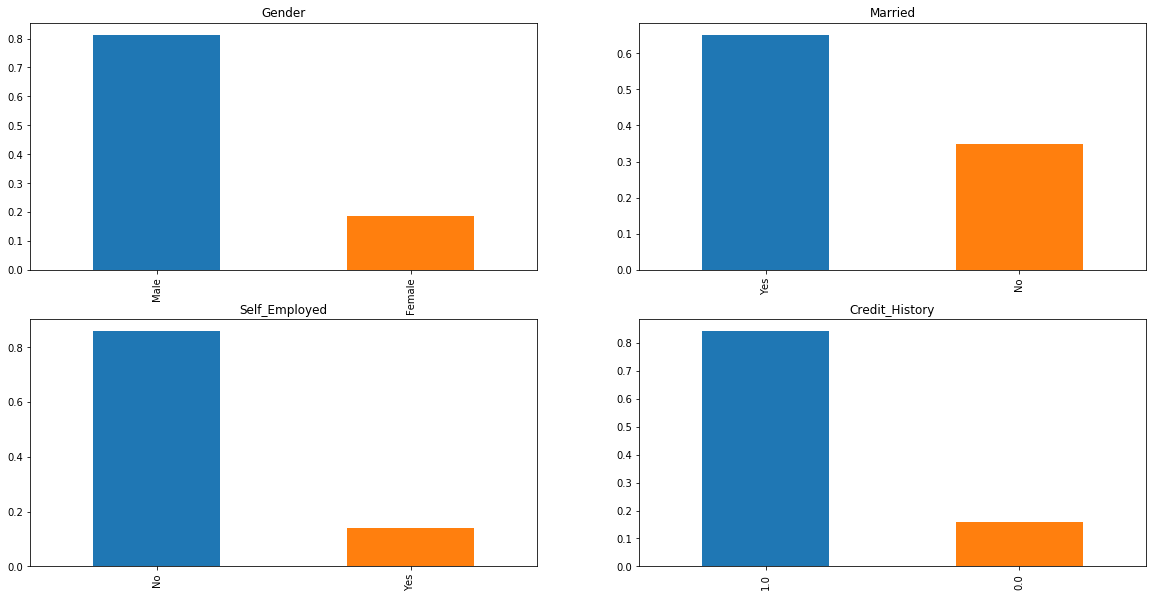

In [12]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

# Univariate Analysis of Ordinal Variables

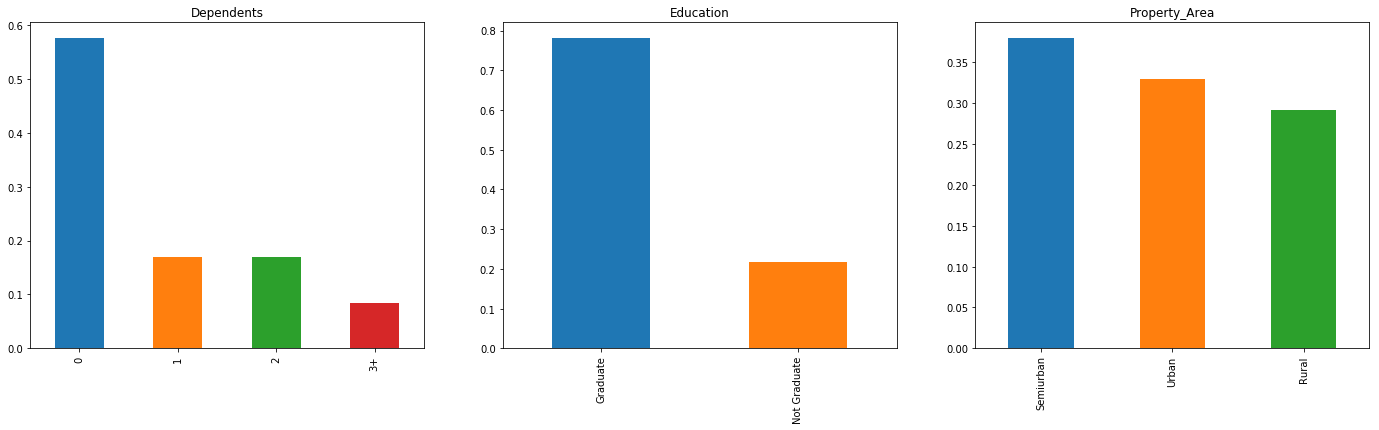

In [13]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

# Univariate Analysis of Independent Variable

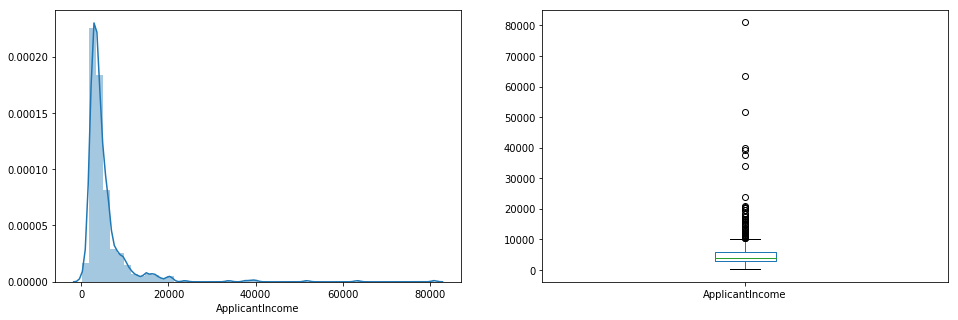

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5,0.98,'')

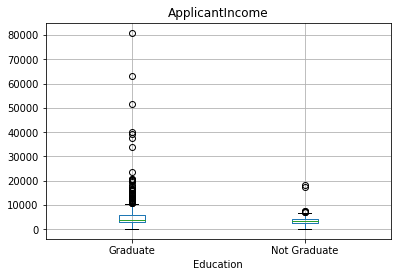

In [15]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

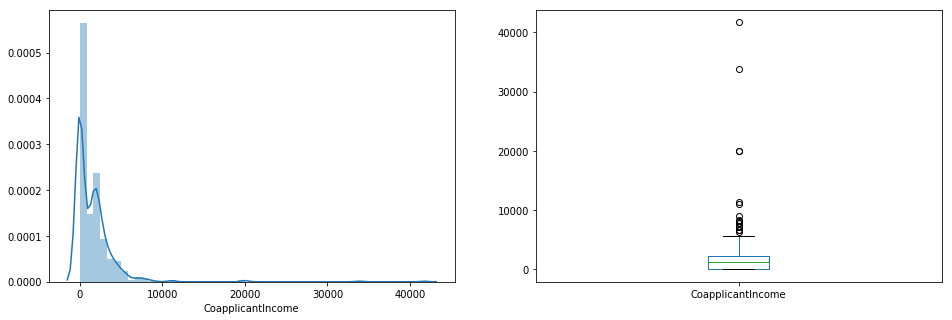

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()


In [17]:
train.columns[train.isna().any()].tolist()

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [18]:
df = train.dropna()

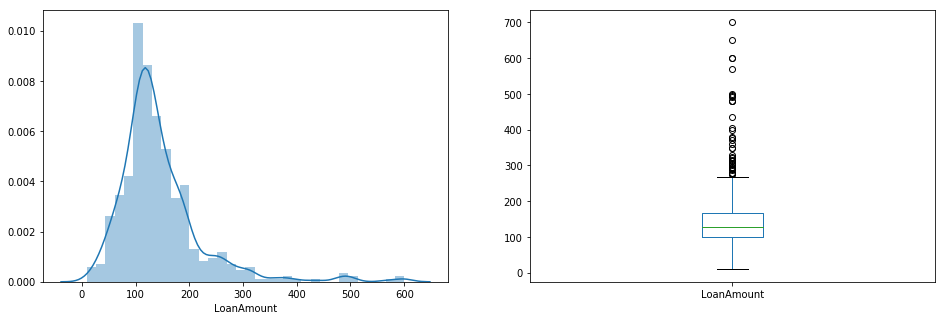

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [20]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

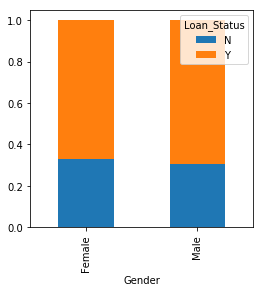

In [21]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

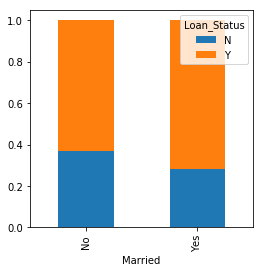

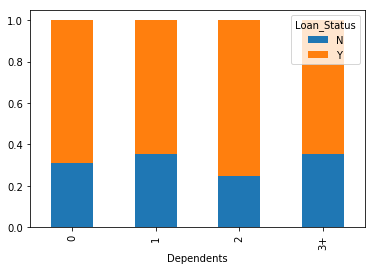

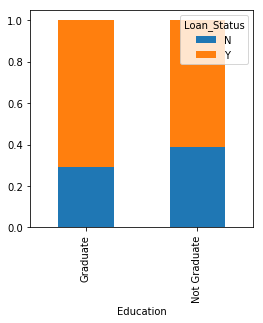

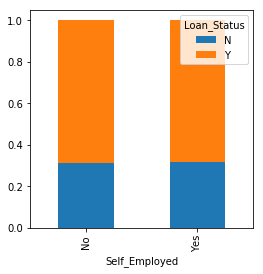

In [22]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

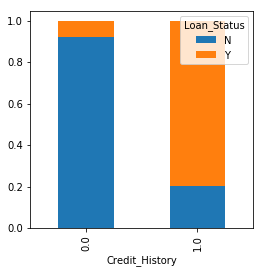

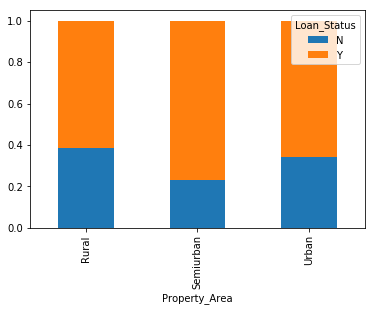

In [23]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

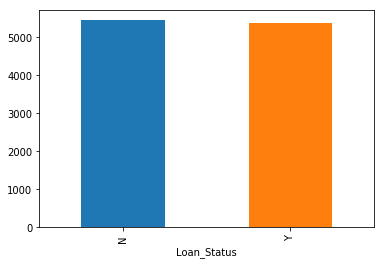

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [26]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Text(0,0.5,'Percentage')

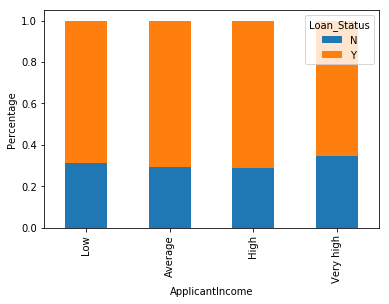

In [28]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

In [29]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Text(0,0.5,'Percentage')

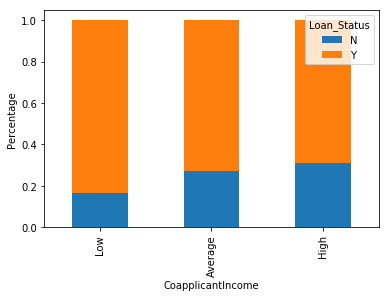

In [30]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

In [31]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [33]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Text(0,0.5,'Percentage')

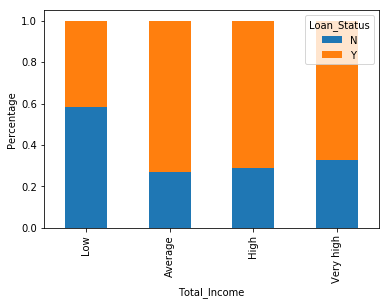

In [34]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

In [35]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

Text(0,0.5,'Percentage')

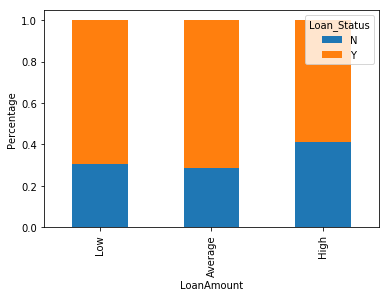

In [36]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [37]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [38]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

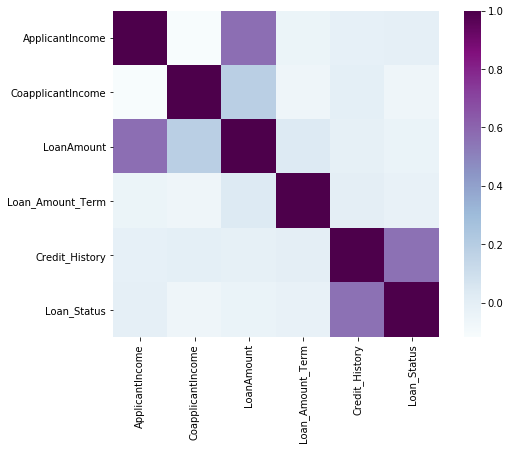

In [43]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu");

In [44]:
train["Education"].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [45]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [47]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [48]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

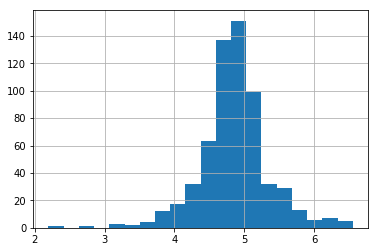

In [50]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])